<a href="https://colab.research.google.com/github/Guhan2348519/QC_LAB/blob/main/2348519_QC_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.6 MB/s eta 0:00:00


In [13]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.8 MB/s eta 0:00:00


In [19]:

!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=4da65f43bf3b5d3b9b2d78705ce2bfd9d341ce084971355e8844334c2e8bb4aa
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [22]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [15]:
c="1"
d="0"

In [25]:

import pylatexenc
protocol=QuantumCircuit (2)
#Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

#Alice's operations
if d == "1":
 protocol.z(0)
if c == "1":
 protocol.x(0)
 protocol.barrier()

#Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()
display(protocol.draw(output='text'))

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

Measured (outcome) with frequency (frequency)


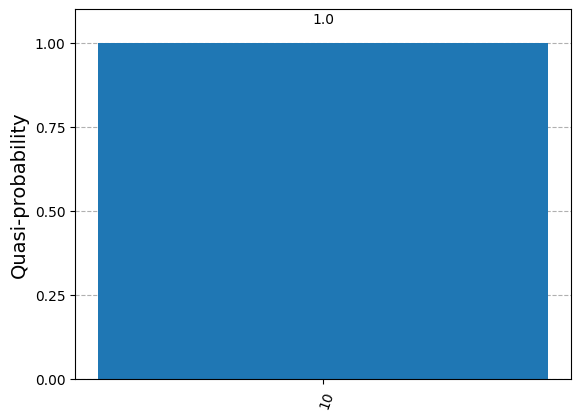

In [27]:
result=Sampler().run(protocol).result()
statistics=result.quasi_dists[0].binary_probabilities()
for outcome,frequency in statistics.items():
 print(f"Measured (outcome) with frequency (frequency)")
display(plot_histogram(statistics))

In [40]:
rbg=QuantumRegister(1, "randomizer")
ebit0=QuantumRegister(1, "A")
ebit1=QuantumRegister(1, "B")
Alice_c=ClassicalRegister(1, "Alice c")
Alice_d=ClassicalRegister(1, "Alice d")

In [41]:
test=QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

In [42]:
#Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'randomizer'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [43]:
#Use the randomizer qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'randomizer'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [44]:

#Now the protocol runs, starting with Alice's actions, which depend
#on her bits.
with test.if_test((Alice_d, 1), label="Z"):
 test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
 test.x(ebit1)
test.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'randomizer'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

In [51]:
#Bob's actions
test.cx(ebit0,ebit1)
test.h(ebit0)
test.barrier()
Bob_c=ClassicalRegister(1, "Bob c")
Bob_d=ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)
display(test.draw(output='text'))